Series([], dtype: int64)


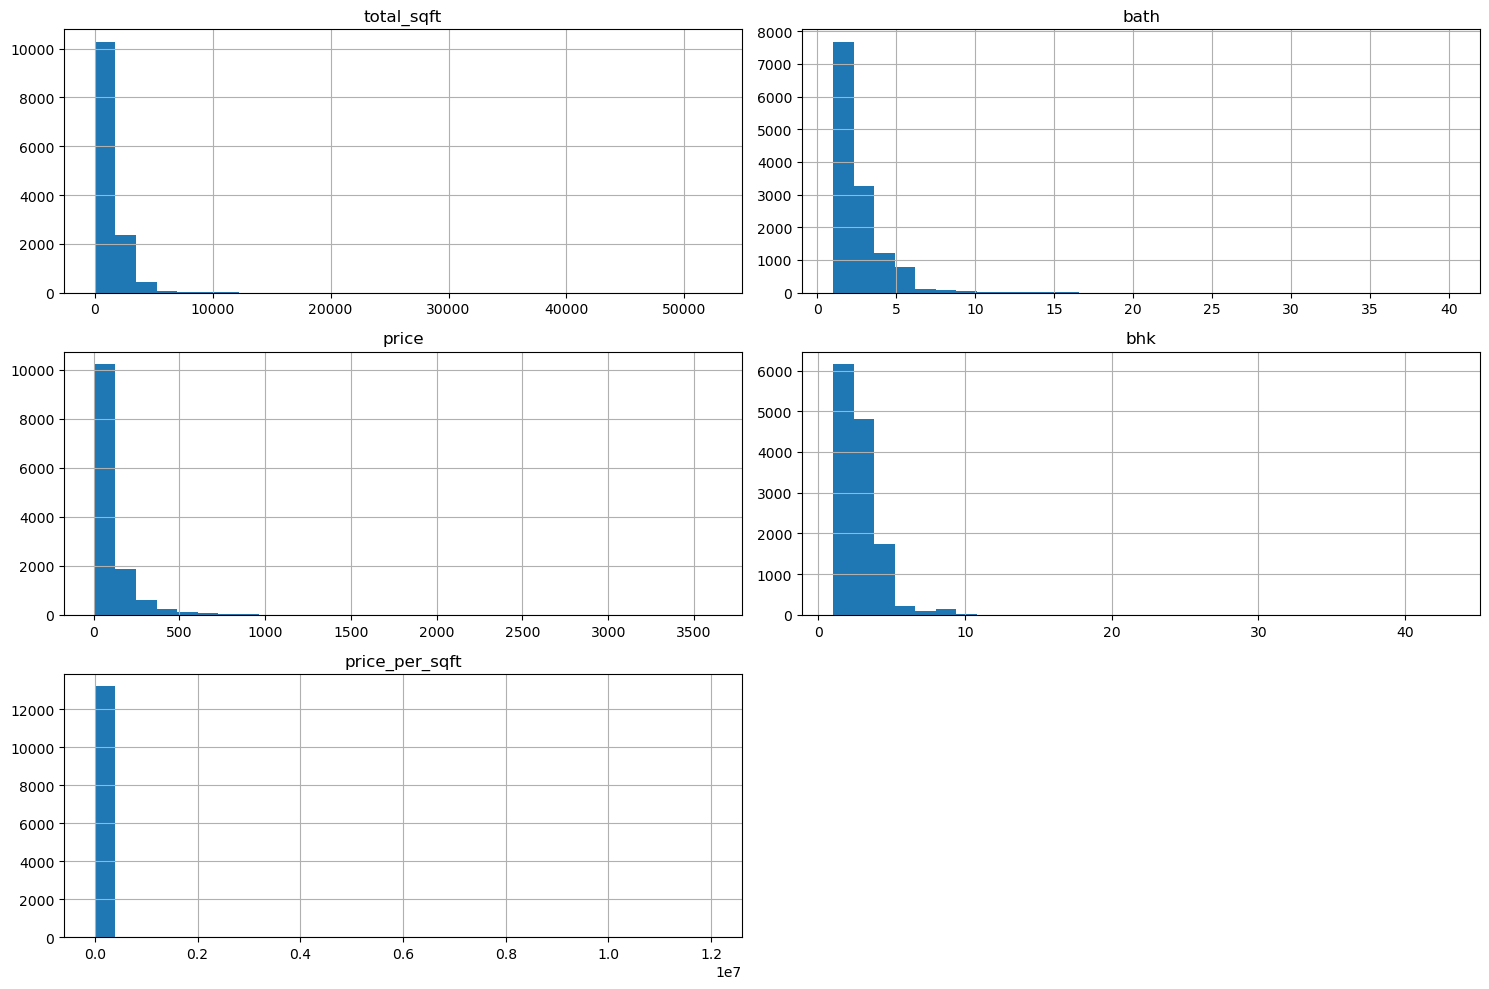

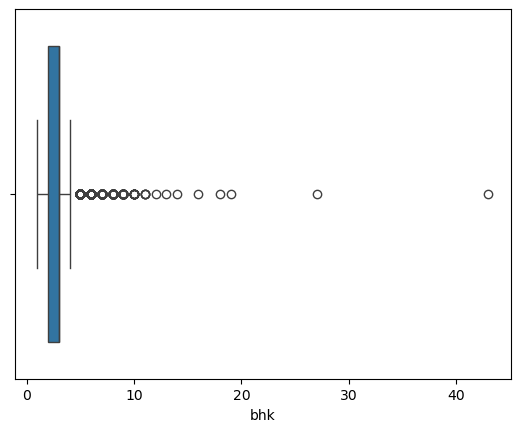

ValueError: could not convert string to float: 'Electronic City Phase II'

In [1]:
# Question 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('house_price.csv')

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


# Histogram for numerical features
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplot for a specific feature
sns.boxplot(x='bhk', data=data)  # Replace with the correct column name
plt.show()


# Correlation matrix
correlation_matrix = data.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


# Count plot for a categorical feature
sns.countplot(x='categorical_feature', data=data)
plt.xticks(rotation=45)
plt.show()


# Group by a categorical feature and calculate mean of a numerical feature
grouped_data = data.groupby('categorical_feature')['numerical_feature'].mean()
print(grouped_data)

In [60]:
# Question 2

import pandas as pd

# Load the dataset
file_path = 'house_price.csv'  # Update the file path if necessary
house_data = pd.read_csv('house_price.csv')


# a) Mean and Standard Deviation

# Choose a column (e.g., 'price') to detect outliers
mean_price = house_data['price'].mean()
std_price = house_data['price'].std()

# Define upper and lower bounds
upper_bound = mean_price + 3 * std_price
lower_bound = mean_price - 3 * std_price

# Detect outliers
outliers_std = house_data[(house_data['price'] > upper_bound) | (house_data['price'] < lower_bound)]


# b) Percentile Method

# Define the percentiles
lower_percentile = house_data['price'].quantile(0.01)
upper_percentile = house_data['price'].quantile(0.99)

# Detect outliers
outliers_percentile = house_data[(house_data['price'] < lower_percentile) | (house_data['price'] > upper_percentile)]


# c) IQR (Interquartile Range) Method

# Calculate Q1, Q3, and IQR
Q1 = house_data['price'].quantile(0.25)
Q3 = house_data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

# Detect outliers
outliers_iqr = house_data[(house_data['price'] < lower_bound_iqr) | (house_data['price'] > upper_bound_iqr)]


# d) Z-Score Method

from scipy.stats import zscore

# Calculate Z-scores
house_data['z_score'] = zscore(house_data['price'])

# Detect outliers
outliers_z_score = house_data[(house_data['z_score'] > 3) | (house_data['z_score'] < -3)]


# Trimming

# Remove outliers based on IQR method as an example
house_data_trimmed = house_data[(house_data['price'] >= lower_bound_iqr) & (house_data['price'] <= upper_bound_iqr)]


# Capping

# Cap values to lower and upper bounds using the Percentile method
house_data_capped = house_data.copy()
house_data_capped['price'] = house_data_capped['price'].clip(lower=lower_percentile, upper=upper_percentile)


# Imputation

# Impute outliers using the median for the price column
price_median = house_data['price'].median()
house_data_imputed = house_data.copy()
house_data_imputed.loc[(house_data_imputed['price'] < lower_bound_iqr) | 
                       (house_data_imputed['price'] > upper_bound_iqr), 'price'] = price_median

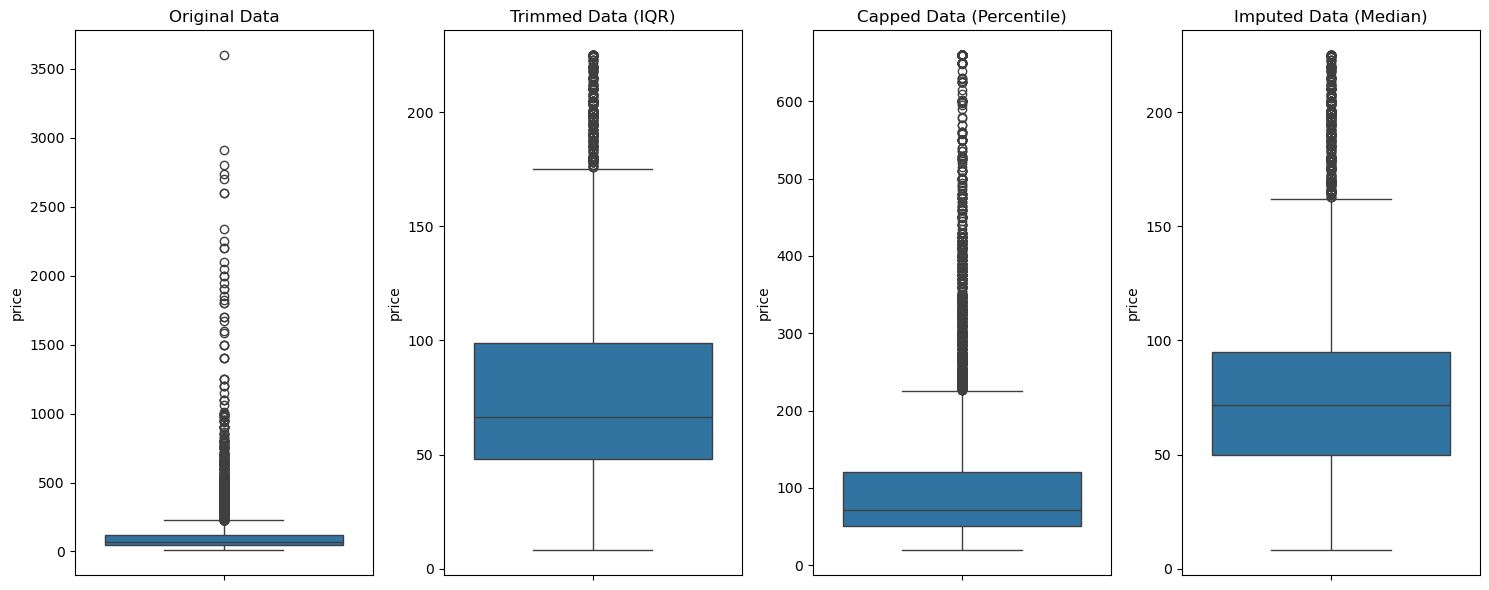

In [35]:
# Question 3

import matplotlib.pyplot as plt
import seaborn as sns

# Original data box plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 4, 1)
sns.boxplot(y=house_data['price'])
plt.title('Original Data')

# Trimmed data box plot
plt.subplot(1, 4, 2)
sns.boxplot(y=house_data_trimmed['price'])
plt.title('Trimmed Data (IQR)')

# Capped data box plot
plt.subplot(1, 4, 3)
sns.boxplot(y=house_data_capped['price'])
plt.title('Capped Data (Percentile)')

# Imputed data box plot
plt.subplot(1, 4, 4)
sns.boxplot(y=house_data_imputed['price'])
plt.title('Imputed Data (Median)')

plt.tight_layout()
plt.show()

Original Skewness: 108.26875024325159
Original Kurtosis: 12090.633538860382
Transformed Skewness: 1.4003259019533636
Transformed Kurtosis: 9.203000543610957


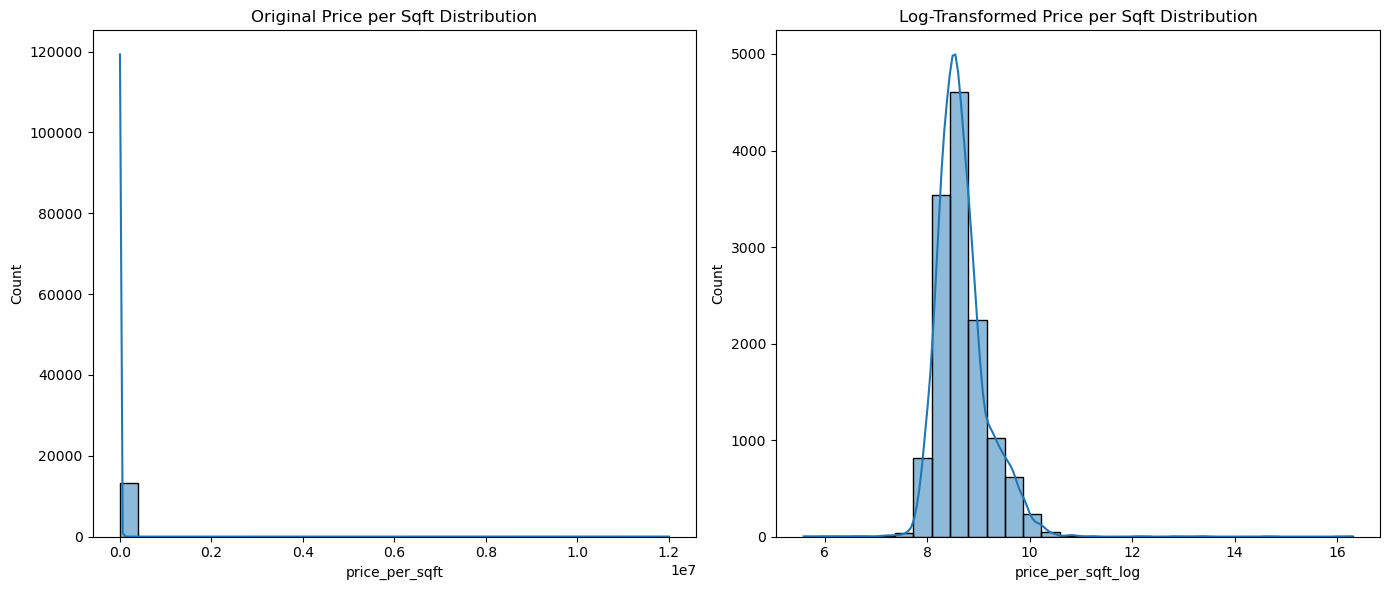

In [37]:
# Question 4

import numpy as np
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Plot histogram and calculate skewness & kurtosis for original data
plt.figure(figsize=(14, 6))

# Plot histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(house_data['price_per_sqft'], kde=True, bins=30)
plt.title('Original Price per Sqft Distribution')

# Calculate skewness and kurtosis for original data
original_skewness = skew(house_data['price_per_sqft'])
original_kurtosis = kurtosis(house_data['price_per_sqft'])

print(f"Original Skewness: {original_skewness}")
print(f"Original Kurtosis: {original_kurtosis}")

# Step 2: Apply logarithmic transformation (log + 1 to avoid log(0) issues)
house_data['price_per_sqft_log'] = np.log1p(house_data['price_per_sqft'])

# Plot histogram and KDE for transformed data
plt.subplot(1, 2, 2)
sns.histplot(house_data['price_per_sqft_log'], kde=True, bins=30)
plt.title('Log-Transformed Price per Sqft Distribution')

# Calculate skewness and kurtosis for transformed data
transformed_skewness = skew(house_data['price_per_sqft_log'])
transformed_kurtosis = kurtosis(house_data['price_per_sqft_log'])

print(f"Transformed Skewness: {transformed_skewness}")
print(f"Transformed Kurtosis: {transformed_kurtosis}")

plt.tight_layout()
plt.show()

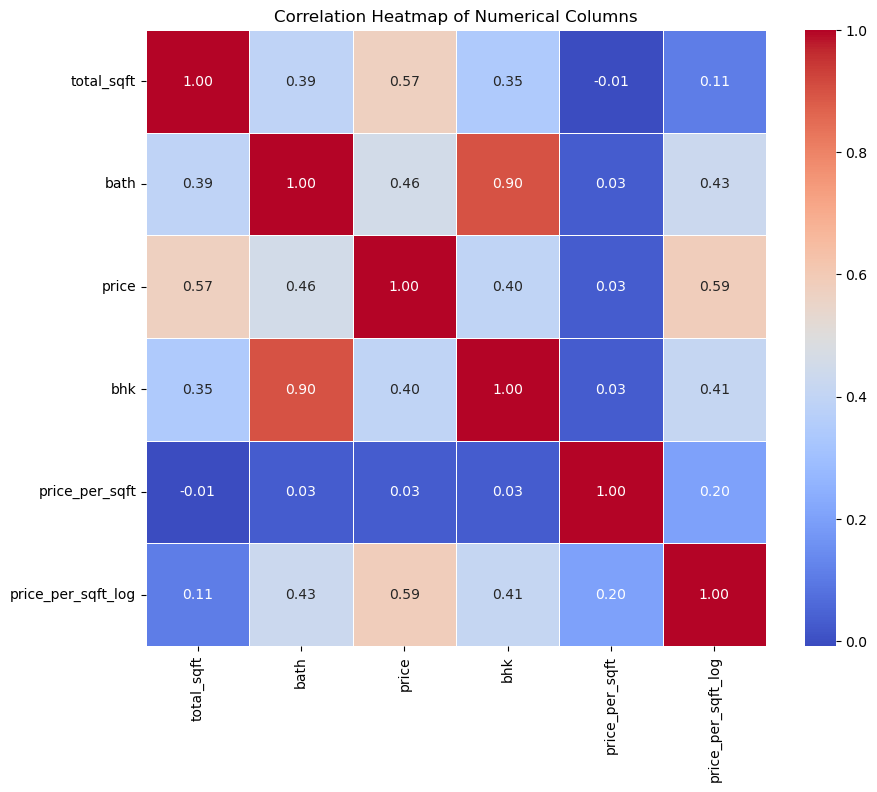

In [39]:
# Question 5

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numerical columns
numerical_data = house_data.select_dtypes(include=['float64', 'int64'])

# Step 2: Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

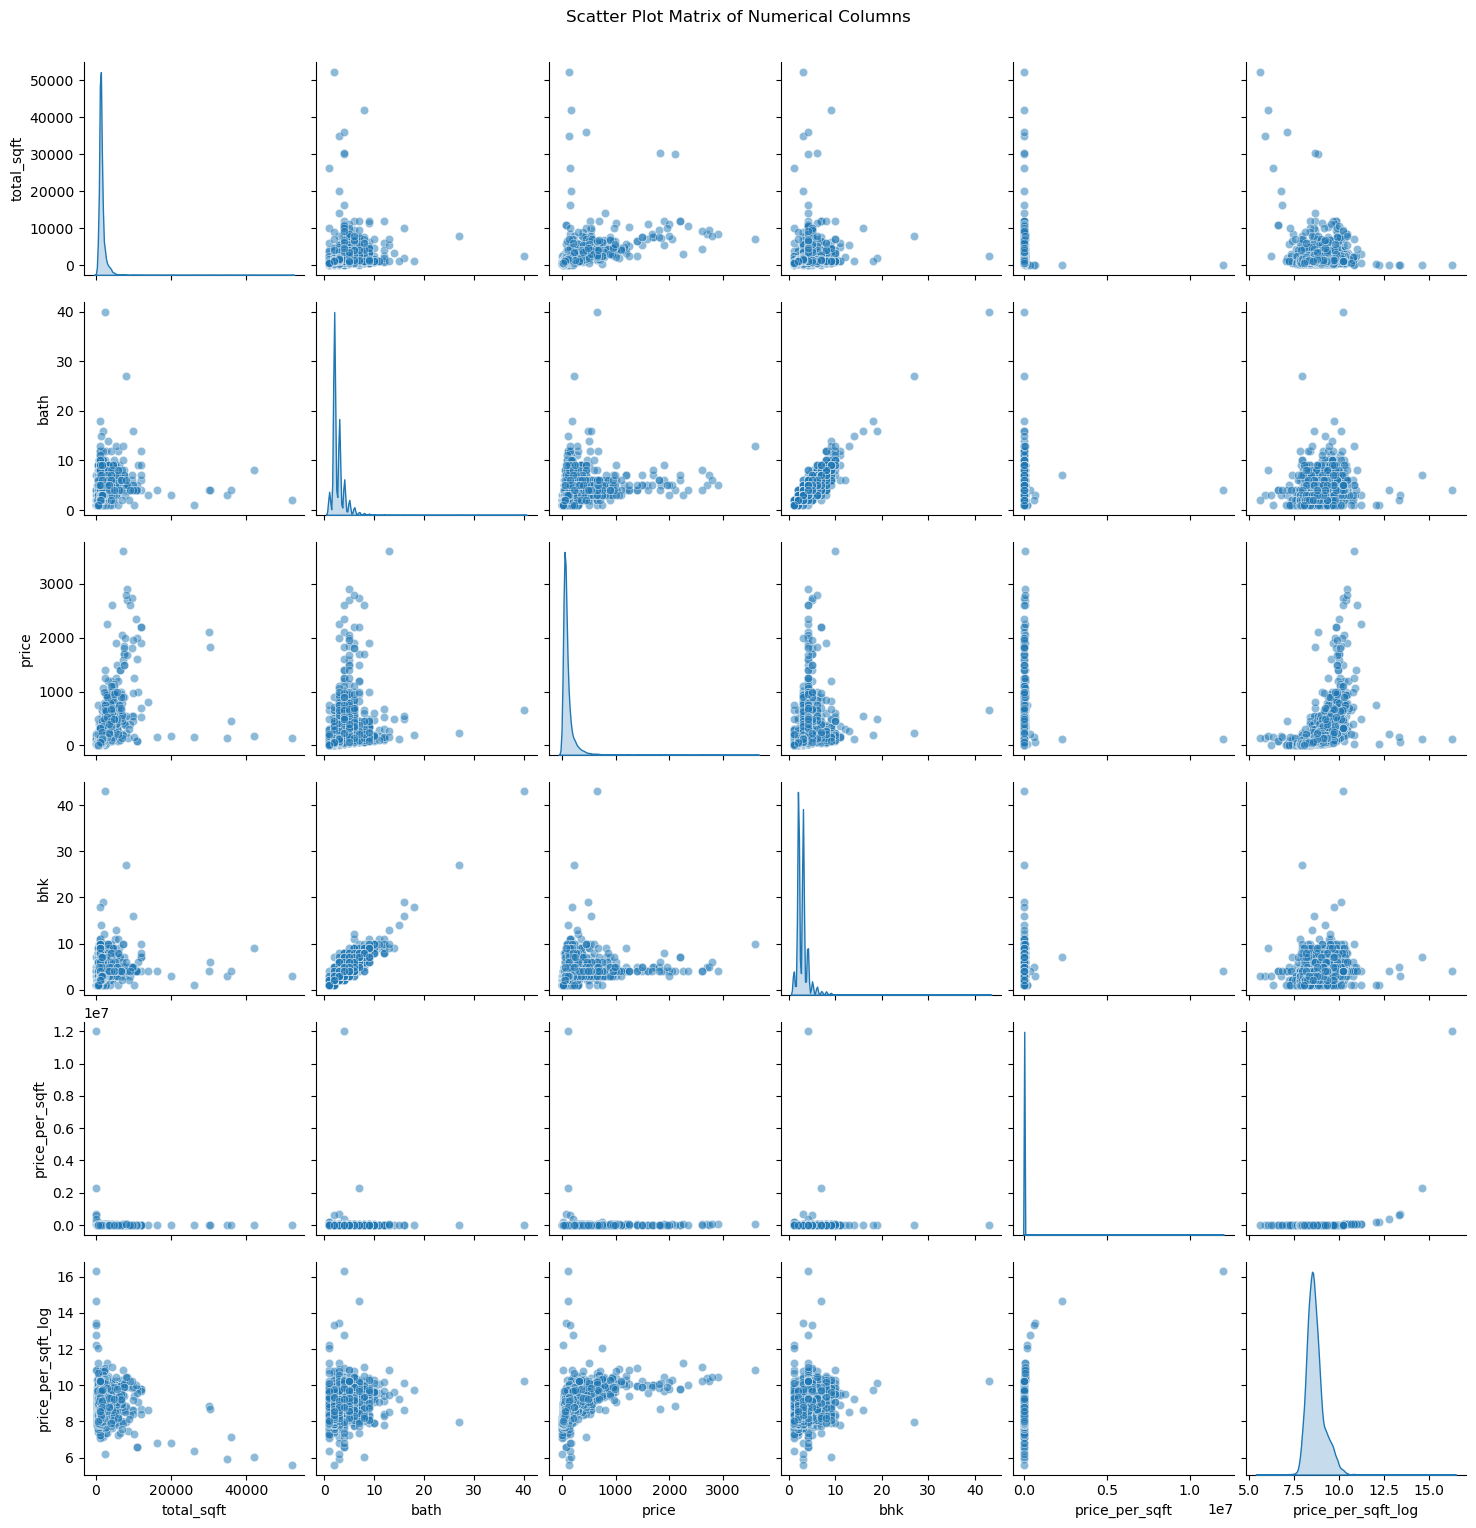

In [42]:
# Question 6

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numerical columns
numerical_data = house_data.select_dtypes(include=['float64', 'int64'])

# Step 2: Plot pairplot to visualize scatter plots between all pairs of numerical variables
sns.pairplot(numerical_data, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Scatter Plot Matrix of Numerical Columns', y=1.02)  # Adjust y for title position
plt.show()